In [232]:
import pickle

import optax

from experiments.src.factory import small, big
from experiments.src.data import *
from experiments.src.experiment import *
from jax import random

In [1]:
%load_ext autoreload
%autoreload 2

In [81]:
small.D_X=2

In [470]:
bnn = small.bnn()
data = ToyData1(feat_D_X=small.D_X, train_size=100)
# data = DataSlice(ToyData1(D_X=small.D_X, train_size=100), slice(0, 20))

Initial eval loss: 1115.5986 (lik: -29.0341, kl: 1086.5646)


100%|██████████| 50/50 [00:15<00:00,  3.32it/s, init loss: 1115.5986, avg. train loss / eval. loss [98000-100000]: -653.8693 / -653.8520]



SVI elapsed time: 15.98856234550476


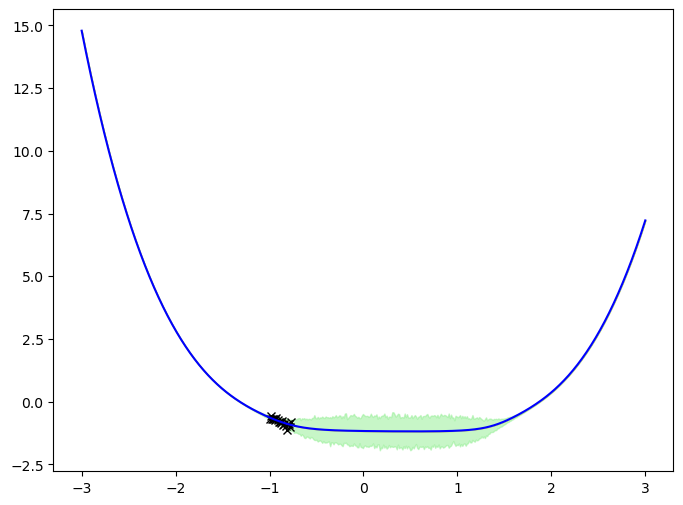

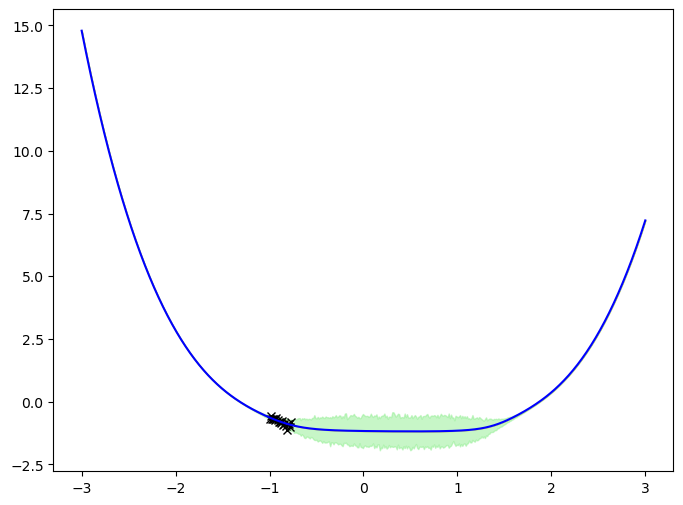

In [76]:
delta = small.map(bnn, data)

delta.train(random.PRNGKey(0))
delta.make_predictions(random.PRNGKey(1))
# delta.to_pickle("pik/delta_128_256_64.pk")
delta.make_plots()#.savefig(f"figs/0map.png")

# del delta

In [473]:
from experiments.src.model import BNNRegressor

In [485]:
data.train[0].shape

(100, 2)

In [488]:
tiny_bnn = BNNRegressor(jax.nn.silu, 2, 1, [20], biases=True)

Initial eval loss: 276.3168 (lik: -180.8639, kl: 95.4530)


100%|██████████| 50/50 [00:17<00:00,  2.85it/s, init loss: 276.3168, avg. train loss / eval. loss [147000-150000]: 95.0740 / 95.0752]



SVI elapsed time: 17.940896034240723


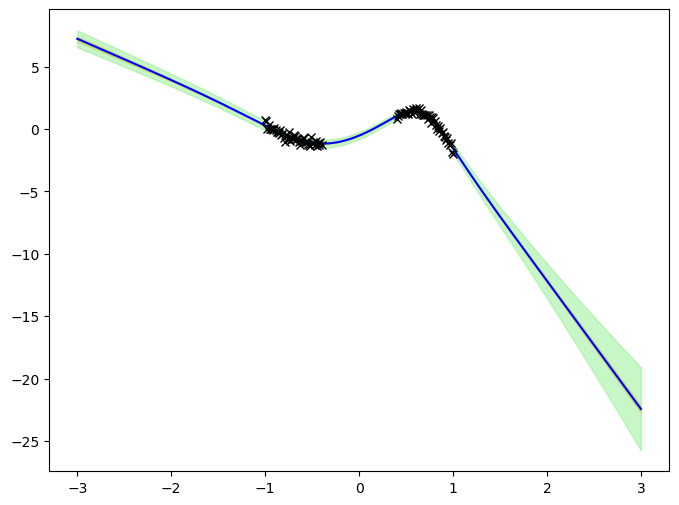

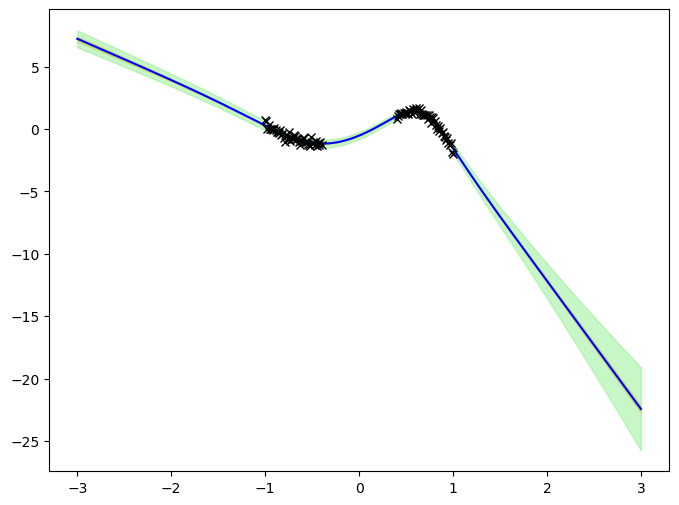

In [489]:
full_laplace = AutoFullRankLaplaceExperiment(tiny_bnn, data, shrink=0.0)
full_laplace.run(random.PRNGKey(0))

(-2.0, 2.0)

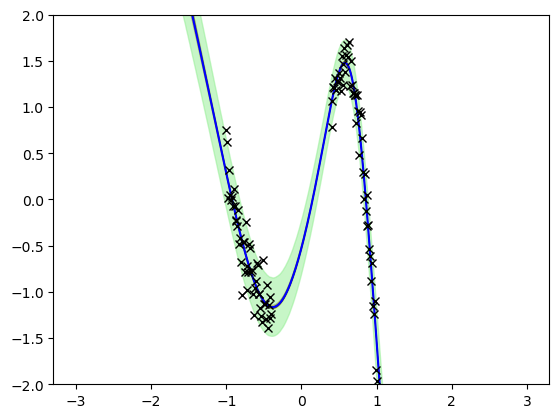

In [491]:
fig, ax = plt.subplots()
full_laplace.make_plots(fig=fig, ax=ax, plot_samples=True)
ax.set_ylim(-2, 2)

In [496]:
curvatures = (full_laplace.posterior[0])
curvatures

Text(0.5, 0.98, 'asd \\beta')

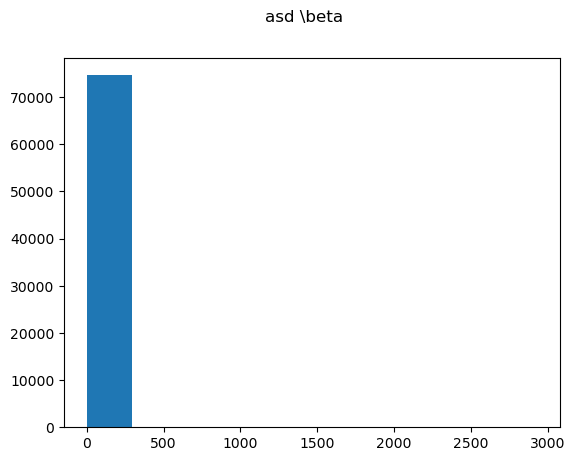

In [506]:
plt.hist((1 / laplace.posterior[0].base_dist.scale**2 - laplace._shrink))
plt.suptitle(r"asd \beta")

In [507]:
tiny_hmc = small.map_then_hmc(tiny_bnn, data)

small
Initial eval loss: 1133.1865 (lik: -986.3582, kl: 146.8284)


100%|██████████| 50/50 [00:25<00:00,  1.96it/s, init loss: 1133.1865, avg. train loss / eval. loss [98000-100000]: 95.0768 / 95.0750]



SVI elapsed time: 27.15575909614563
Initial eval loss: 6015.3911 (lik: -5892.2046, kl: 123.1866)


100%|██████████| 50/50 [00:35<00:00,  1.40it/s, init loss: 6015.3911, avg. train loss / eval. loss [98000-100000]: 95.0768 / 95.0748]



SVI elapsed time: 35.72462511062622
Initial eval loss: 398.6586 (lik: -260.5238, kl: 138.1349)


100%|██████████| 50/50 [00:18<00:00,  2.63it/s, init loss: 398.6586, avg. train loss / eval. loss [98000-100000]: 95.0768 / 95.0744]



SVI elapsed time: 19.06490969657898
Initial eval loss: 351.0135 (lik: -205.8508, kl: 145.1628)


100%|██████████| 50/50 [00:13<00:00,  3.70it/s, init loss: 351.0135, avg. train loss / eval. loss [98000-100000]: 95.0768 / 95.0747]



SVI elapsed time: 13.7636239528656
(4, 102)


In [508]:
tiny_hmc.train(random.PRNGKey(0))

sample: 100%|██████████| 450/450 [02:42<00:00,  2.77it/s]



MCMC elapsed time: 170.60500812530518


In [511]:
tiny_bnn.D_H

[20]

In [516]:
new_tiny_hmc = BasicHMCExperiment(tiny_bnn, data)
new_tiny_hmc._predictions = tiny_hmc._predictions

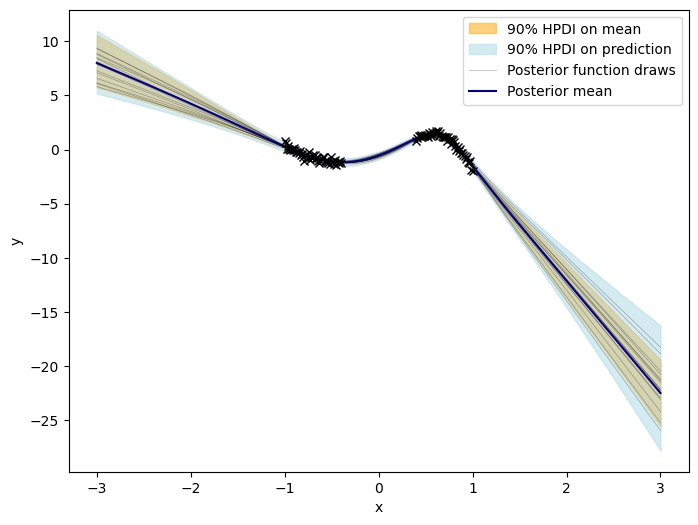

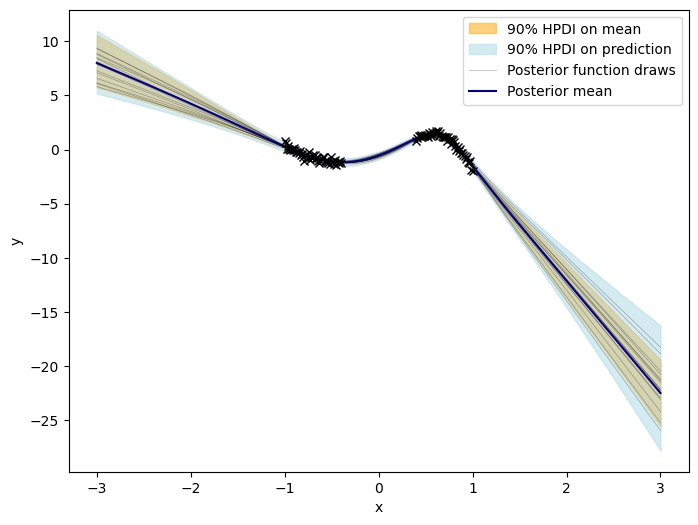

In [517]:
new_tiny_hmc.make_plots(plot_samples=True, legend=True)

In [518]:
tiny_hmc._samples['w'].shape

(1600, 102)

In [525]:
def fn(x):
    return np.mean(x)

NUM_TEST_Ys = 3
x_obs = np.array([1., 4., 5.])
l_true = fn(x_obs)
B = 10
ls = np.empty(B)
for b in range(B):
    x_star = x_obs[np.random.choice(np.arange(NUM_TEST_Ys), size=NUM_TEST_Ys, replace=True)]
    ls[b] = fn(x_star)

In [527]:
2*l_true - np.quantile(ls, q=(0.9, 0.1))

array([1.66666667, 4.66666667])

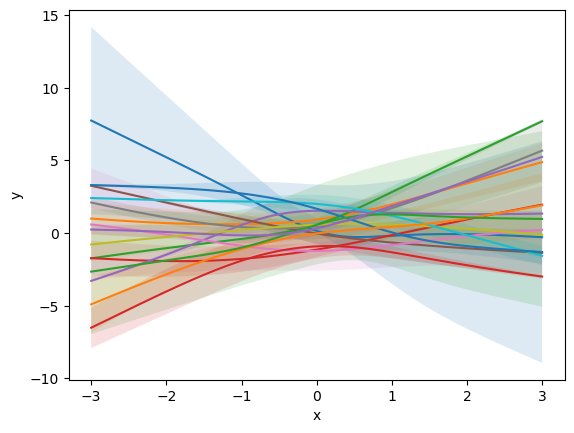

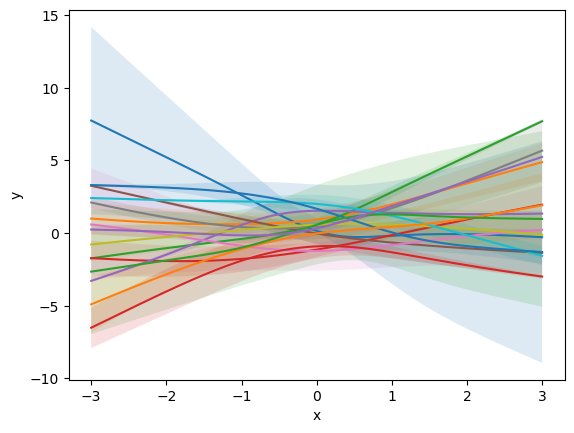

In [529]:
plot_prior_samples(tiny_bnn, data)

In [530]:
bnn

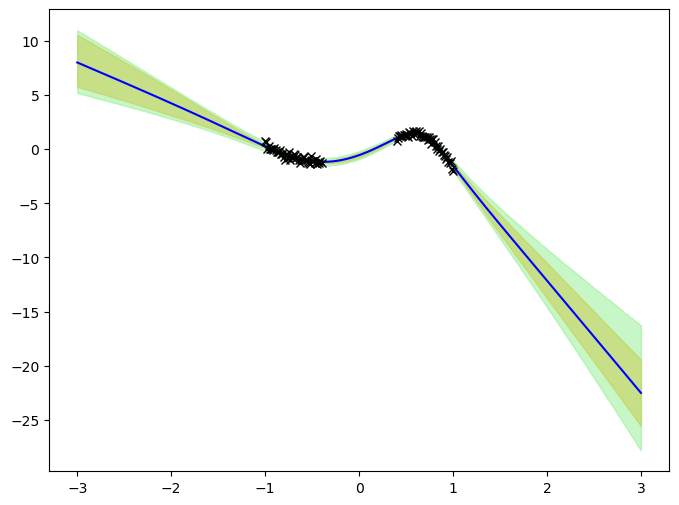

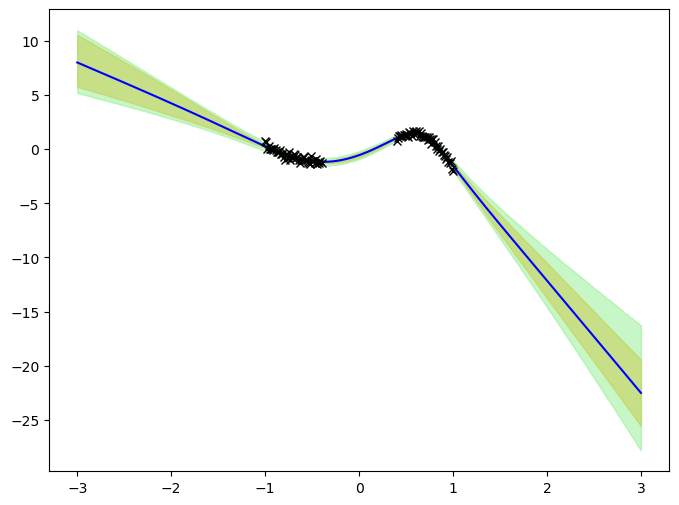

In [510]:
tiny_hmc.make_predictions(random.PRNGKey(1))
tiny_hmc.make_plots()

In [471]:
delta._bnn.get_weight_dim()

74690

Initial eval loss: -629.7411 (lik: 44.4435, kl: -585.2976)


0it [00:00, ?it/s]


SVI elapsed time: 0.06514716148376465


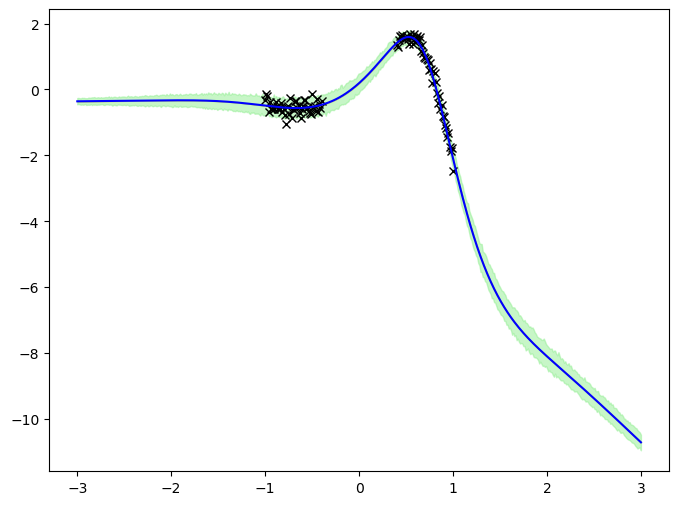

In [31]:
delta = AutoDeltaVIExperiment.from_pickle(bnn, data, "pik/delta_small.pk")

delta.make_predictions(random.PRNGKey(1))
delta.make_plots().savefig(f"figs/00map.png")

sample: 100%|██████████| 450/450 [00:41<00:00, 10.80it/s, 1023 steps of size 6.02e-03. acc. prob=0.99]



MCMC elapsed time: 44.016335010528564


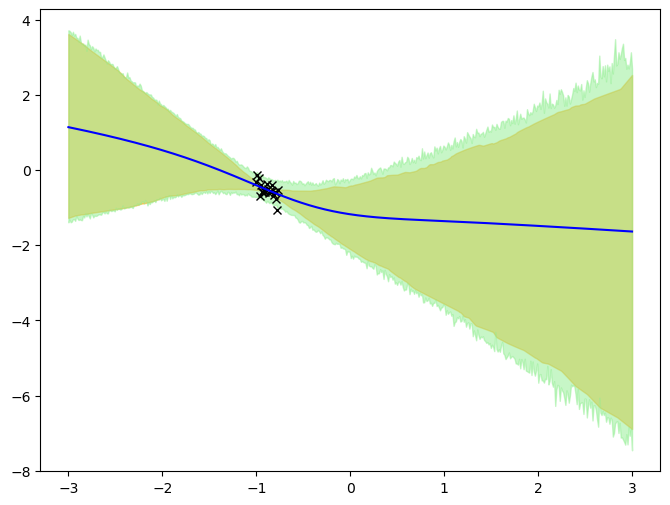

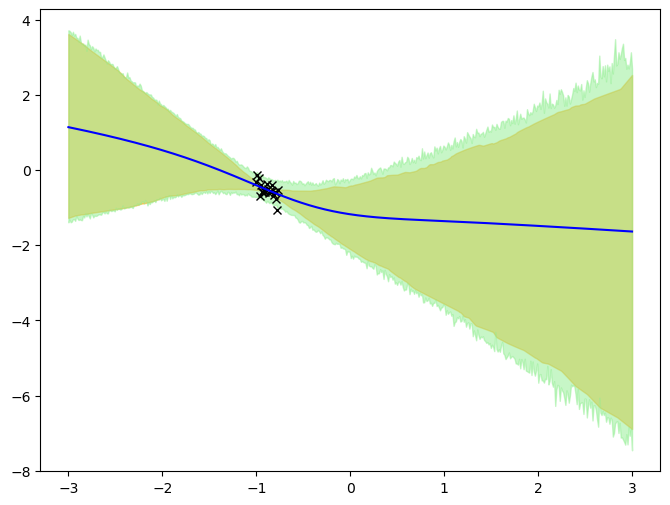

In [61]:
hmc = small.hmc(bnn, data, delta)
hmc.train(random.PRNGKey(0))
# hmc.to_pickle("pik/hmc_small.png")
# hmc = BasicHMCExperiment.from_pickle(bnn, data, "pik/hmc_small.png")
hmc.make_predictions(random.PRNGKey(1))
hmc.make_plots()#.savefig(f"figs/00hmc.png")

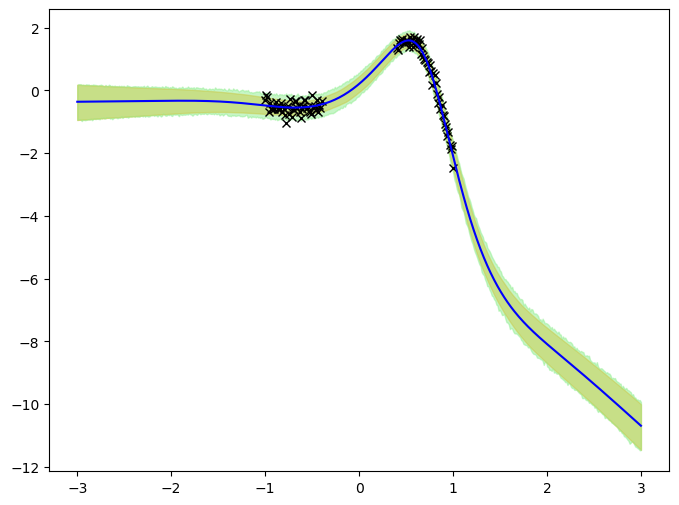

In [34]:
# laplace = small.diag_laplace(bnn, data, delta)
# laplace.train(random.PRNGKey(0))
# laplace.to_pickle("pik/laplace_small.pk")
# laplace.make_predictions(random.PRNGKey(1))
# laplace.make_plots().savefig("figs/0lap.png")

# del laplace

Initial eval loss: -629.5203 (lik: 44.2335, kl: -585.2868)


0it [00:00, ?it/s]


SVI elapsed time: 0.06115603446960449


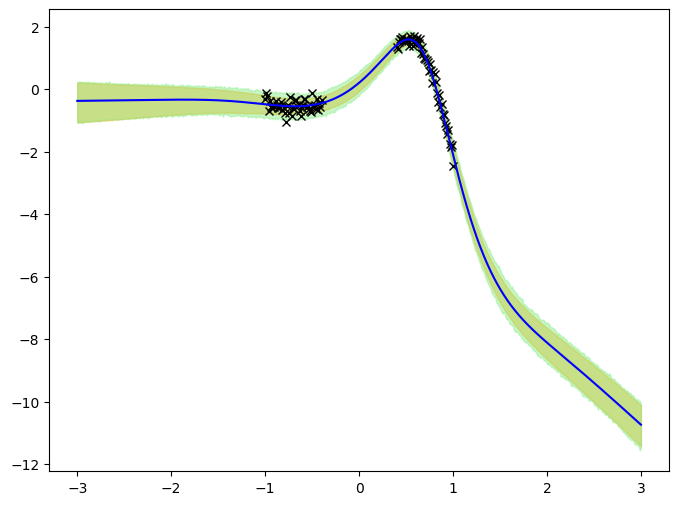

In [25]:
laplace = AutoDiagonalLaplaceExperiment.from_pickle(bnn, data, "pik/laplace_small.pk")
laplace.make_predictions(random.PRNGKey(1))
laplace.make_plots().savefig("figs/00lap.png")

100%|██████████| 10000/10000 [00:12<00:00, 832.76it/s, init loss: -651.7486, avg. loss [9501-10000]: -650.3063]


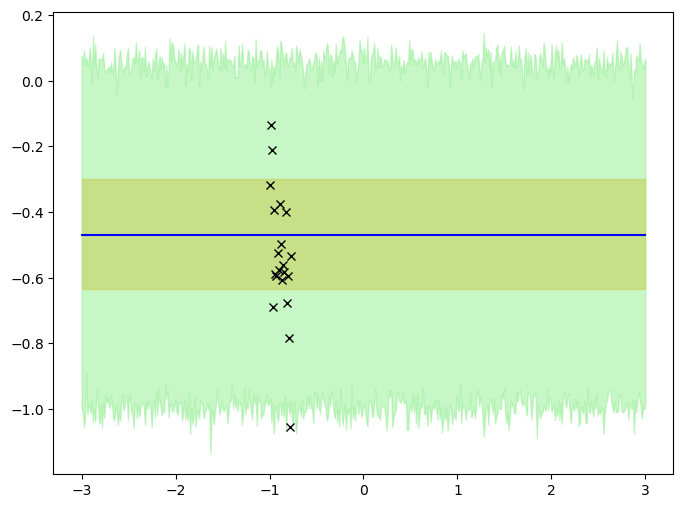

In [123]:
swag = small.swag(bnn, data, swag._map_experiment)
# swag = small.swag(bnn, data, delta)
swag.train(random.PRNGKey(0))
# swag.to_pickle("pik/swag_small.pk")
swag.make_predictions(random.PRNGKey(1))
_ = swag.make_plots()

Initial eval loss: -629.7411 (lik: 44.4435, kl: -585.2976)


0it [00:00, ?it/s]


SVI elapsed time: 0.031113862991333008


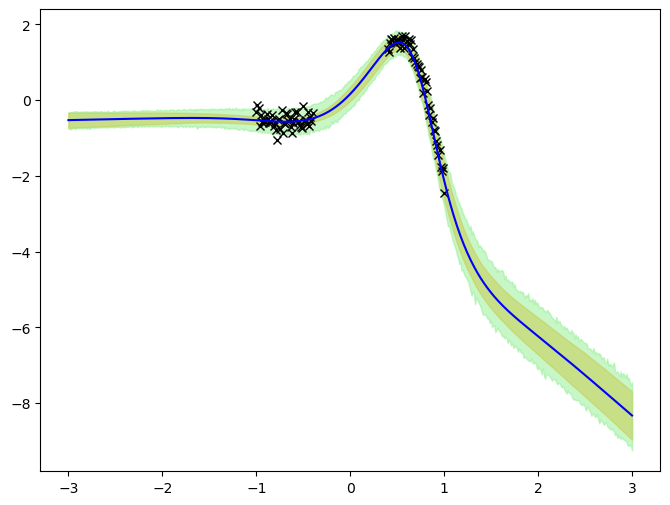

In [38]:
# swag = SWAGExperiment.from_pickle(bnn, data, "pik/swag_small.pk")
# swag.make_predictions(random.PRNGKey(1))
# _ = swag.make_plots()

In [124]:
swag_post_bnn = bnn.with_prior(*swag.posterior)
swag_post_map = small.map(swag_post_bnn, swag._data)

In [125]:
swag_post_map.train(random.PRNGKey(0), num_iter=1)

Initial eval loss: -36971.5000 (lik: 1.2207, kl: -36970.2812)


100%|██████████| 1/1 [00:02<00:00,  2.32s/it, init loss: -36971.5000, avg. train loss / eval. loss [0-1]: -36971.5000 / 4387810724538650377884532736.0000]


SVI elapsed time: 2.3914430141448975


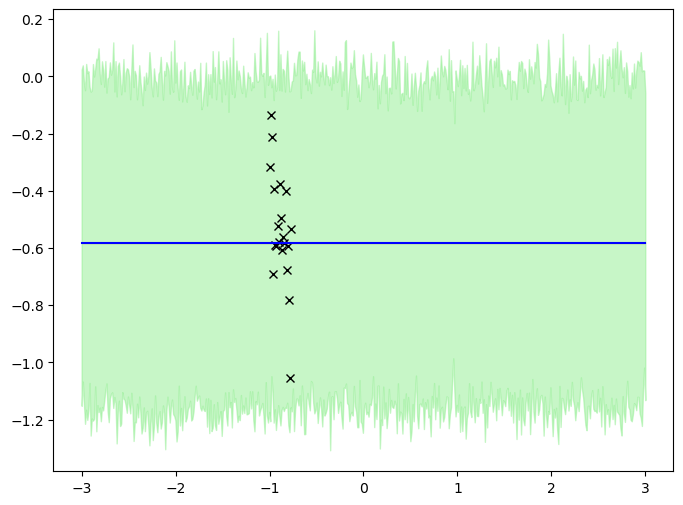

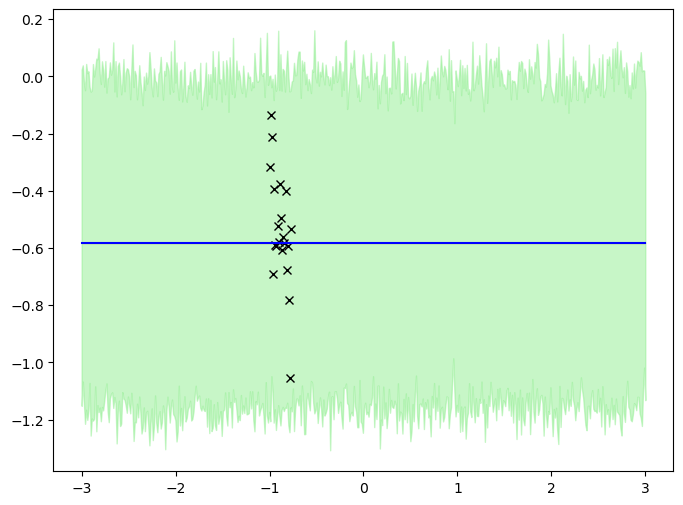

In [120]:
swag_post_map.make_predictions(random.PRNGKey(1))
_ = swag_post_map.make_plots()

Initial eval loss: 4534.4517 (lik: -158.4048, kl: 4376.0469)


100%|██████████| 50/50 [01:32<00:00,  1.85s/it, init loss: 4534.4507, avg. train loss / eval. loss [98000-100000]: 65.8408 / 65.2937]



SVI elapsed time: 94.30136895179749


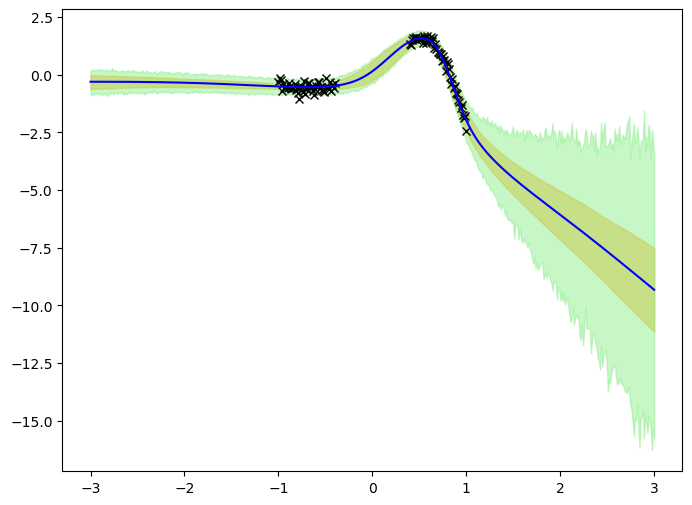

In [42]:
bnn.BETA = small.BETA
vi = small.mfvi(bnn, data)
vi.train(random.PRNGKey(0))
bnn.BETA = 1.0
vi.to_pickle("pik/mfvi_small.pk")
vi.make_predictions(random.PRNGKey(1))
_ = vi.make_plots()

In [45]:
se = SequentialExperiment(bnn, data, small.diag_laplace)

In [46]:
se.train(random.PRNGKey(0))

TypeError: small.diag_laplace() missing 1 required positional argument: 'trained_map_experiment'

In [55]:
e = small.map_then_diag_laplace(bnn, data)

small
Initial eval loss: 1224.8575 (lik: -196.8647, kl: 1027.9928)


100%|██████████| 50/50 [00:34<00:00,  1.43it/s, init loss: 1224.8575, avg. train loss / eval. loss [98000-100000]: -629.6526 / -629.7411]


SVI elapsed time: 35.146329164505005


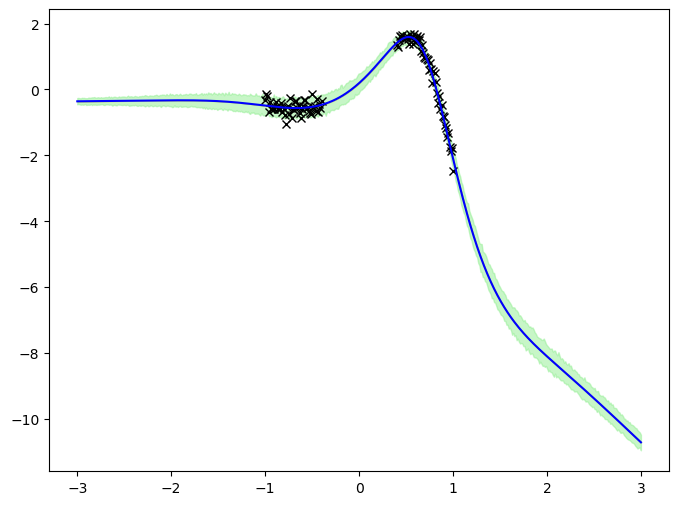

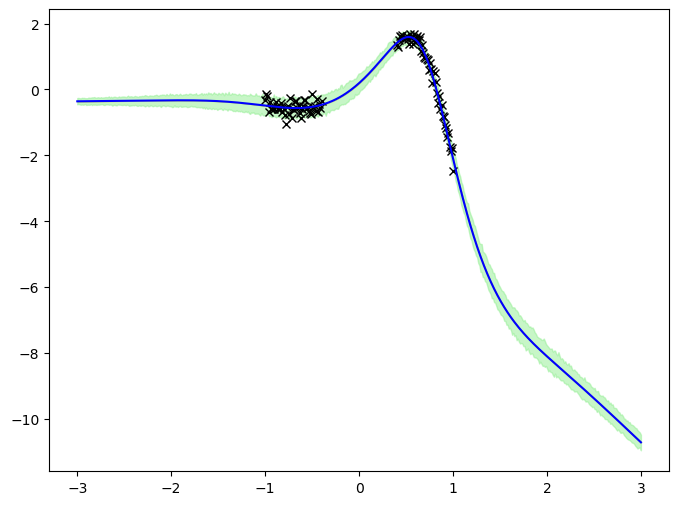

In [57]:
e._map_experiment.make_predictions(random.PRNGKey(1))
e._map_experiment.make_plots()

### Big

In [182]:
bnn = big.bnn()

In [183]:
bnn.get_weight_dim()

74690

In [193]:
delta = big.map(bnn, data)

In [201]:
delta.train(random.PRNGKey(0), num_iter=5000)

Initial eval loss: -96948.4844 (lik: 12.5733, kl: -96935.9141)


100%|██████████| 50/50 [00:28<00:00,  1.75it/s, init loss: 20995080.0000, avg. train loss / eval. loss [4900-5000]: -96951.6484 / -96951.8203]


SVI elapsed time: 28.55680513381958


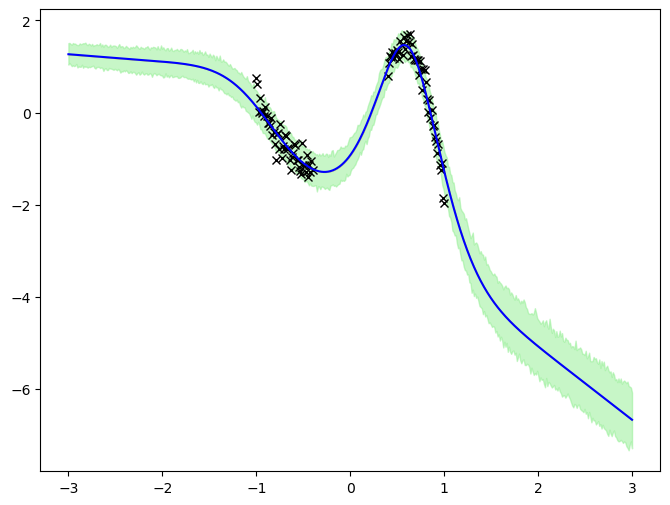

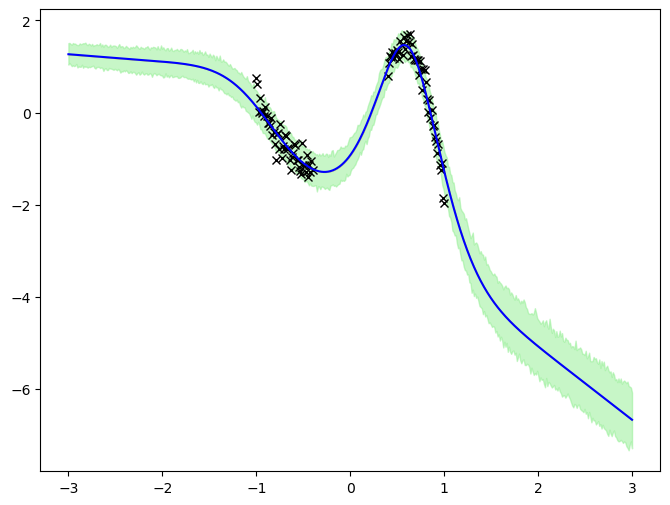

In [202]:
delta.make_predictions(random.PRNGKey(1))
delta.make_plots()

In [196]:
hmc = big.hmc(bnn, data, delta)

sample: 100%|██████████| 100/100 [08:38<00:00,  5.19s/it, 1023 steps of size 4.78e-03. acc. prob=0.92]



MCMC elapsed time: 523.341970205307


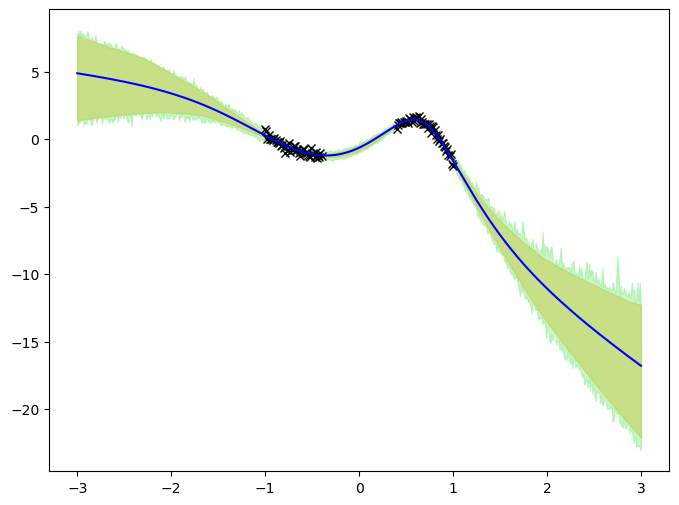

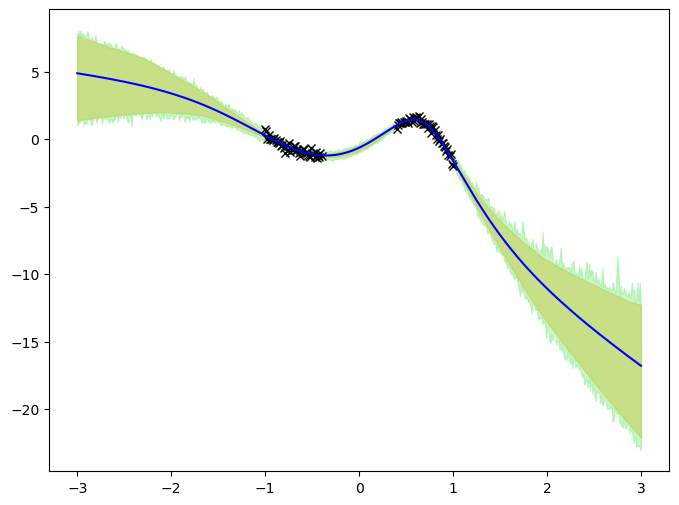

In [197]:
hmc.run(random.PRNGKey(0))

In [198]:
hmc._samples['w'].shape

(50, 74690)

In [209]:
laplace = big.diag_laplace(bnn, data, delta)

In [210]:
laplace.train(random.PRNGKey(0))

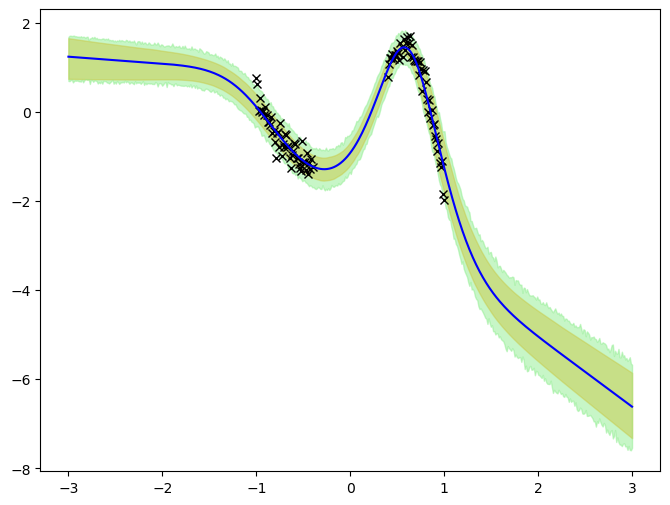

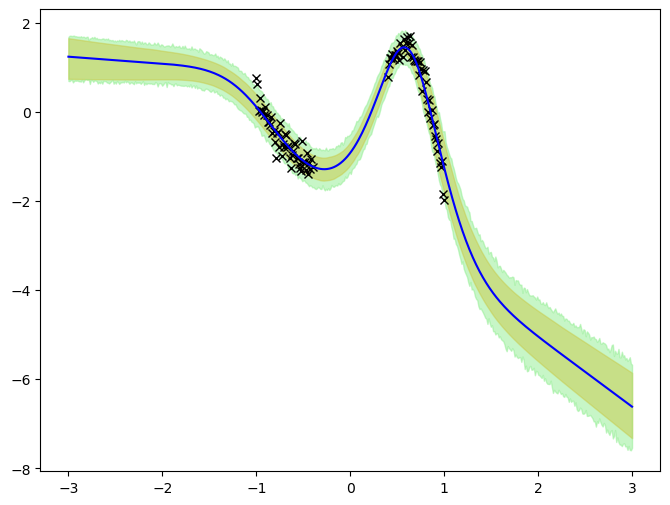

In [211]:
laplace.make_predictions(random.PRNGKey(1))
laplace.make_plots()

In [215]:
swag = big.swag(bnn, data, delta)

In [216]:
swag.train(random.PRNGKey(0))

100%|██████████| 4000/4000 [00:57<00:00, 69.12it/s, init loss: -96951.8203, avg. loss [3801-4000]: -96922.3281]


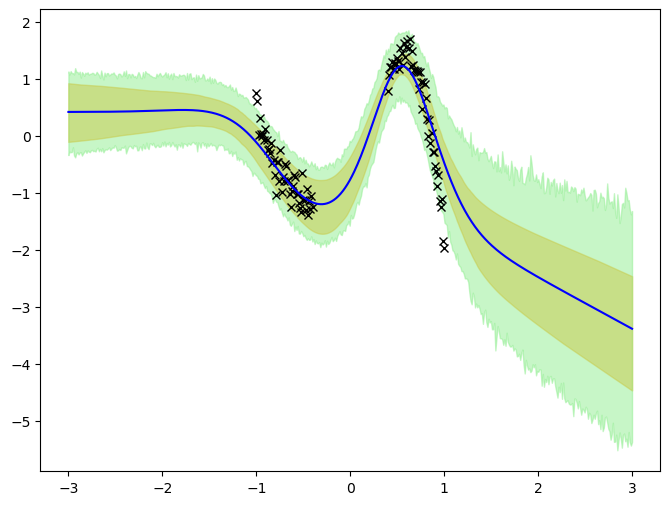

In [217]:
swag.make_predictions(random.PRNGKey(1))
_ = swag.make_plots()

In [232]:
vi = big.mfvi(bnn, data)

In [233]:
big.BETA

0.01

In [237]:
bnn.BETA = big.BETA
vi.train(random.PRNGKey(0), num_iter=10_000)
bnn.BETA = 1.0

Initial eval loss: 67.1823 (lik: 13.7782, kl: 80.9605)


100%|██████████| 50/50 [01:41<00:00,  2.02s/it, init loss: 7093.6826, avg. train loss / eval. loss [9800-10000]: 37.0604 / 33.6076]


SVI elapsed time: 101.36895203590393


In [238]:
vi._losses[::1000]

DeviceArray([7093.6826  , 5879.5933  , 5024.5195  , 4283.1943  ,
             3574.7715  , 2964.6704  , 2365.718   , 1796.5802  ,
             1265.0992  ,  802.6221  ,  413.37296 ,  248.16457 ,
              173.78821 ,  136.63474 ,  113.74221 ,  104.7538  ,
               87.607735,   79.63034 ,   75.974915,   62.858574,
               56.426968,   79.19419 ,   49.953506,   66.75139 ,
               45.6986  ,   47.774048,   54.264633,   26.76154 ,
               30.701218,   44.337   ], dtype=float32)

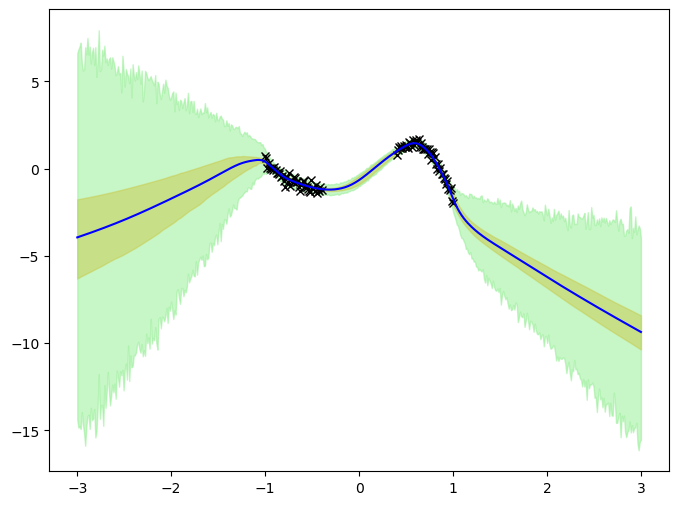

In [240]:
vi.make_predictions(random.PRNGKey(1))
_ = vi.make_plots()

In [288]:
new_vi = big.mfvi(bnn, data)

In [289]:
new_vi._predictions = vi._predictions

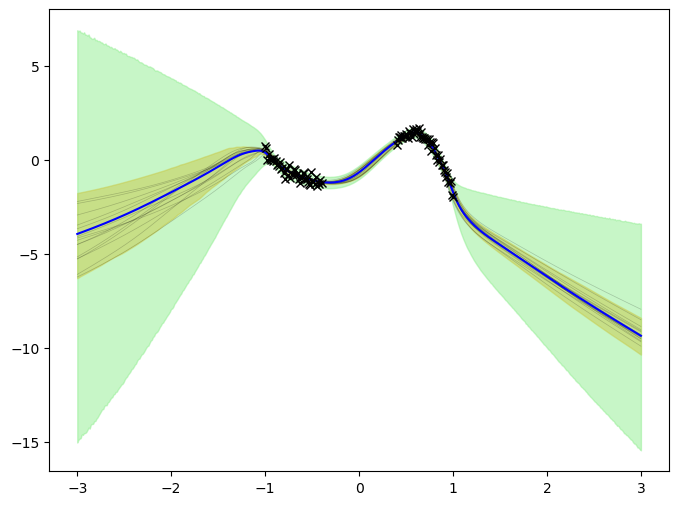

In [290]:
new_vi.make_plots(plot_samples=True).savefig("/tmp/newimg.png")

In [265]:
Y_scale = jnp.array([[2.,0.5,1.],
                    [1.,2.,0.5]])
Y_mean_pred = jnp.array([[0.,5.,10.],
                        [1.,6.,9.]])

In [432]:
big.D_X = 2
exp_bnn = big.bnn()

In [430]:
flat_data = DataSlice(ToyData1(gen_D_X=3, feat_D_X=2, train_size=100), slice(0, 50))

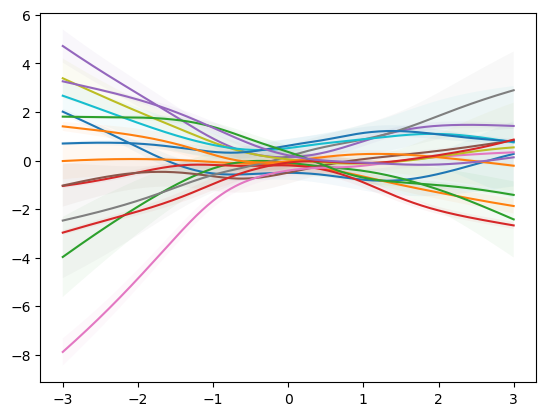

In [433]:
_ = plot_prior_samples(exp_bnn, flat_data)

In [439]:
flat_delta = big.map(exp_bnn, flat_data)

In [442]:
# flat_delta._lr_schedule = optax.constant_schedule(-0.01)
# exp_bnn.BETA = 1.
flat_delta.train(random.PRNGKey(0), num_iter=4000)
# exp_bnn.BETA = 1.

Initial eval loss: -23557.5801 (lik: -117.7277, kl: -23675.3086)


100%|██████████| 50/50 [00:24<00:00,  2.04it/s, init loss: -23557.5801, avg. train loss / eval. loss [3920-4000]: -97182.8750 / -97182.7969]


SVI elapsed time: 24.57504415512085


In [448]:
bnn.get_weight_dim()

74690

In [466]:
prior_exp = PriorExperiment(bnn, data, num_samples=2_000)

In [467]:
prior_exp.make_predictions(random.PRNGKey(1))

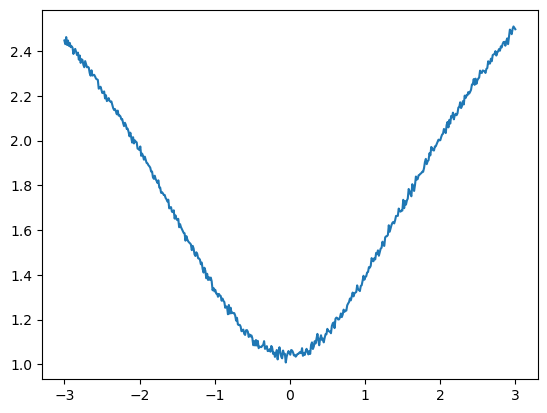

In [468]:
import matplotlib.pyplot as plt
plt.plot(data.test[0][:, 1], prior_exp.compute_test_bald_scores(random.PRNGKey(0)))

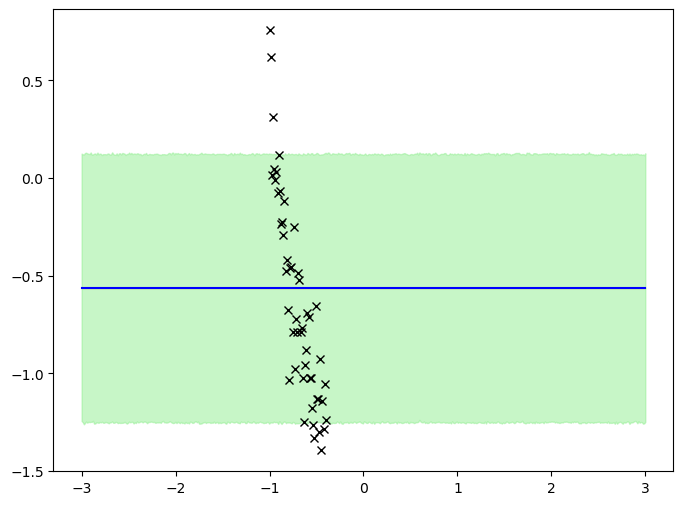

In [443]:
flat_delta.make_predictions(random.PRNGKey(1))
_ = flat_delta.make_plots()

In [444]:
flat_laplace = big.diag_laplace(exp_bnn, flat_data, flat_delta)

In [445]:
flat_laplace.train(random.PRNGKey(0))

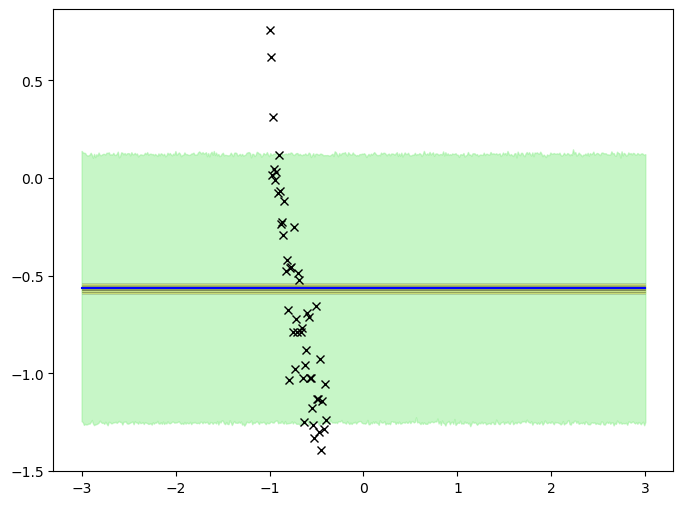

In [446]:
flat_laplace.make_predictions(random.PRNGKey(1))
_ = flat_laplace.make_plots(plot_samples=True, num_extend_samples=50)

## Plotting

In [2]:
import matplotlib.pyplot as plt
import numpyro
from jax import random

from experiments.src.data import *
import experiments.src.factory

In [3]:
DEVICE = "gpu"
numpyro.set_platform(DEVICE)

In [3]:
import matplotlib
matplotlib.use("nbAgg")

In [4]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [11]:
# Plotting
plt.rcParams.update({
    "axes.grid": True,  # show grid by default
    "axes.titlesize": 20,
    "axes.titlepad": 10.0,
    "axes.labelsize": 18,
    "figure.constrained_layout.use": True,
    "figure.titlesize": 22,
    "figure.subplot.wspace": 0.3,
    "font.size": 15,
    "font.weight": "normal",  # bold fonts
    "xtick.labelsize": 15,  # large tick labels
    "ytick.labelsize": 15,  # large tick labels
    "legend.frameon": False, # No frame on legend
    "lines.linewidth": 1,  # thick lines
    "lines.color": "k",  # black lines
    # "grid.color": "0.5",    # gray gridlines
    "grid.linestyle": "-",  # solid gridlines
    "grid.linewidth": 0.3,  # thin gridlines
    "savefig.dpi": 300,  # higher resolution output.
})

In [17]:
fig, axs = plt.subplots(figsize=(18, 9), nrows=2, ncols=3, sharey="all")
axs = axs.ravel()

In [7]:
data = ToyData1(feat_D_X=2)
bnn = experiments.src.factory.small.bnn()
experiments.src.factory.small.HMC_NUM_CHAINS = 2
hmc = experiments.src.factory.small.map_then_hmc(bnn, data)

Initial eval loss: 1810.7034 (lik: -824.1234, kl: 986.5800)


100%|██████████| 50/50 [00:31<00:00,  1.57it/s, init loss: 1810.7034, avg. train loss / eval. loss [98000-100000]: -583.1113 / -583.1024]



SVI elapsed time: 34.51830697059631
Initial eval loss: 11491.1240 (lik: -10416.4648, kl: 1074.6594)


100%|██████████| 50/50 [00:21<00:00,  2.28it/s, init loss: 11491.1240, avg. train loss / eval. loss [98000-100000]: -590.8748 / -590.8704]


SVI elapsed time: 21.950082063674927


In [8]:
hmc.train(random.PRNGKey(0))

sample: 100%|██████████| 450/450 [04:34<00:00,  1.64it/s]



MCMC elapsed time: 282.7519428730011


In [9]:
hmc.make_predictions(random.PRNGKey(1))

In [18]:
from experiments.src.experiment import plot_prior_samples
plot_prior_samples(bnn, data, ndraws=2, fig=fig, ax=axs[3], legend=True)

<Figure size 1800x900 with 6 Axes>

In [200]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple, HandlerLine2D

In [226]:
legend_elements = [(
    (
        Line2D([0], [0], color='blue', lw=1),
        Patch(facecolor='blue', lw=0, alpha=0.1)
    ),
    (
        Line2D([0], [0], color='orange', lw=1),
        Patch(facecolor='orange', lw=0, alpha=0.1)
    ),
    Line2D([0], [0], color='black', lw=0, marker='o', markerfacecolor='black', markersize=0.5),
)]
handler_map={legend_elements[0]: HandlerTuple(ndivide=3, pad=None), Line2D: HandlerLine2D(marker_pad=0.05, numpoints=3)}

In [220]:
axs[3].legend(legend_elements, ['Function draws (mean+-std)'], handler_map=handler_map)
leg = axs[3].get_legend()

In [19]:
leg = axs[3].get_legend()

{'_stale': True,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <Axes: xlabel='x', ylabel='y'>,
 'figure': <Figure size 1800x900 with 6 Axes>,
 '_transform': <matplotlib.transforms.IdentityTransform at 0x7f8dcbabb910>,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f8dcbabb7f0>,
 '_remove_method': <bound method Axes._remove_legend of <Axes: xlabel='x', ylabel='y'>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 'prop': <matplotlib.font_manager.FontProperties at 0x7f8dcbabb820>,
 '_fontsize': 15.0,
 'texts': [Text(0, 0, 'Function draws (mean+-std)')],
 'legend_handles': [<matplotlib.lines.Line2D at 0x7

In [20]:
hmc.make_plots(fig=fig, ax=axs[0], plot_samples=False, legend=True)
axs[0].set_ylim(-6, 6)
axs[0].set_title("HMC with legend")
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles + leg._legend_elements_arg, labels + [leg.texts[0].get_text()], handler_map=leg.get_legend_handler_map())

In [21]:
fig.show()

<IPython.core.display.Javascript object>

In [125]:
hmc.make_plots(fig=fig, ax=axs[2], plot_samples=True)
axs[2].set_ylim(-6, 6)
# axs[2].plot([-2, 2], [5, 5], label="Log-likelihood estimator (16000 samples)")
axs[2].plot([-2, 2], [1, 1], 'kx', label="Previously seen data points")
leg = axs[2].legend()

In [126]:
fig.legend(leg.legend_handles, [t.get_text() for t in leg.texts], loc="outside lower center", ncol=5)
leg.remove()

In [132]:
fig.show()

<IPython.core.display.Javascript object>

In [128]:
fig.savefig("/tmp/figtest.png")

In [109]:
leg.texts[0].get_text()

'90% HPDI on mean'

In [66]:
f, a = plt.subplots()
a.plot([1, 2], [1, 1])
f.legend(_58.legend_handles, _58.texts, loc="outside lower center")
f.tight_layout()
f.show()

<IPython.core.display.Javascript object>